## Logistic regression
### Visualizing data

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd

In [46]:
cwd = Path.cwd()
file_path = Path(cwd).joinpath(r'Unit4', 'input_dataset-2.parquet')
print(file_path)

C:\Users\100cgj\OneDrive - Sysco AS\Dokumenter\Hackaton\krafthack2022onsite\Unit4\input_dataset-2.parquet


In [48]:
tic = time.time()
df = pd.read_parquet(file_path)
toc = time.time()
print("Load Time:",toc-tic)


Load Time: 0.7666382789611816


In [49]:
dfColumns = df.columns
data = []
for x in dfColumns:
    data.append(df[x])

## Unfixed Data

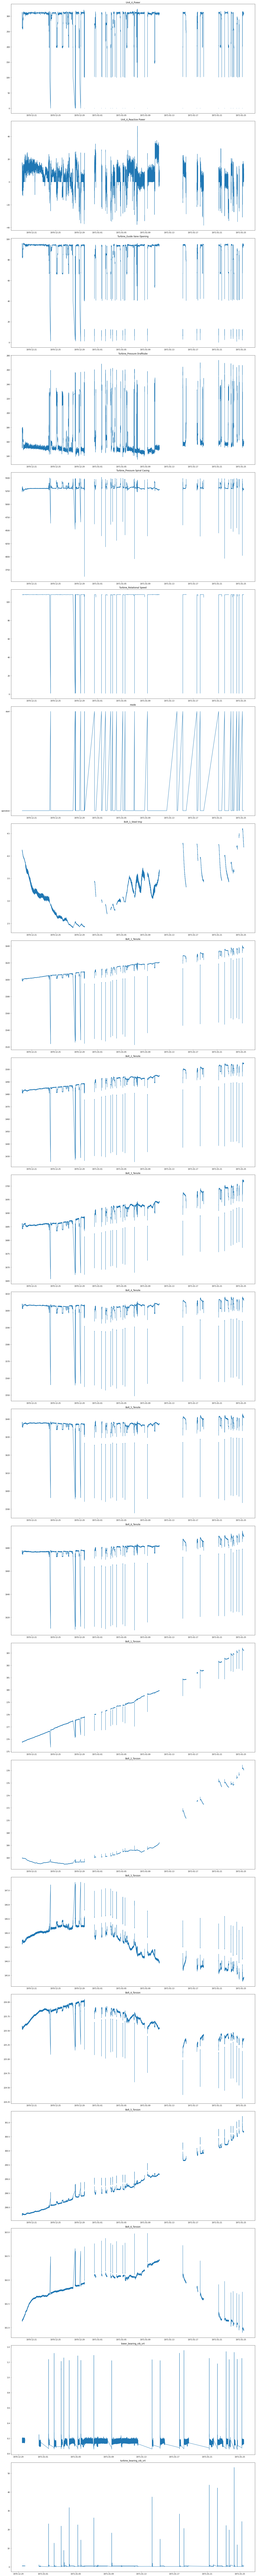

In [50]:
fig, axs = plt.subplots(len(data), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].plot(data[i])
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show()

## Fix the data and save to a new files with fixed data

Delete the data where there is no value

create a dataframe for each bolt tension and torsion

In [87]:
dfColumns

Index(['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode', 'Bolt_1_Steel tmp',
       'Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile', 'Bolt_1_Torsion', 'Bolt_2_Torsion',
       'Bolt_3_Torsion', 'Bolt_4_Torsion', 'Bolt_5_Torsion', 'Bolt_6_Torsion',
       'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt'],
      dtype='object')

In [89]:
bolt1Columns = list(dfColumns[0:7])
bolt1Columns.append(dfColumns[-1])
bolt1Columns.append(dfColumns[-2])
bolt1Columns.append(dfColumns[8])
bolt1Columns.append(dfColumns[14])
print(bolt1Columns)

['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening', 'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing', 'Turbine_Rotational Speed', 'mode', 'turbine_bearing_vib_vrt', 'lower_bearing_vib_vrt', 'Bolt_1_Tensile', 'Bolt_1_Torsion']


In [90]:
bolt1Df =  df[bolt1Columns].copy()

In [91]:
bolt1Df.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,turbine_bearing_vib_vrt,lower_bearing_vib_vrt,Bolt_1_Tensile,Bolt_1_Torsion
timepoints,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,NaN,NaN,1598.481390,175.758460
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,NaN,NaN,1598.477449,175.755164
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,NaN,NaN,1598.479316,175.764601
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,NaN,NaN,1598.490184,175.763157
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,NaN,NaN,1598.494073,175.760959


In [94]:
bolt1Df = bolt1Df.dropna(subset=['Bolt_1_Torsion', 'Bolt_1_Tensile'])

In [98]:
dataBolt1 = []
for x in bolt1Columns:
    dataBolt1.append(bolt1Df[x])

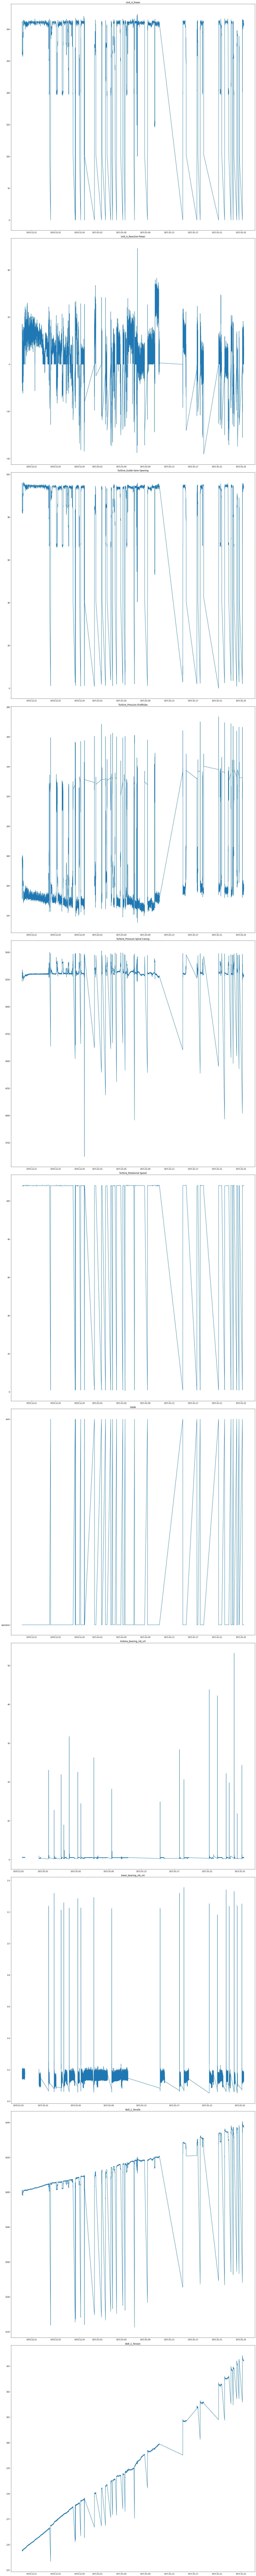

In [99]:
fig, axs = plt.subplots(len(dataBolt1), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].plot(dataBolt1[i])
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

## Divide data to oppstart and operation

In [112]:
Bolt1Operationdf = bolt1Df.drop(bolt1Df[bolt1Df['mode'] == 'start'].index)
Bolt1Startdf = bolt1Df.drop(bolt1Df[bolt1Df['mode'] == 'operation'].index)

In [121]:
dataBolt1Operation = []
for x in bolt1Columns:
    dataBolt1Operation.append(Bolt1Operationdf[x])

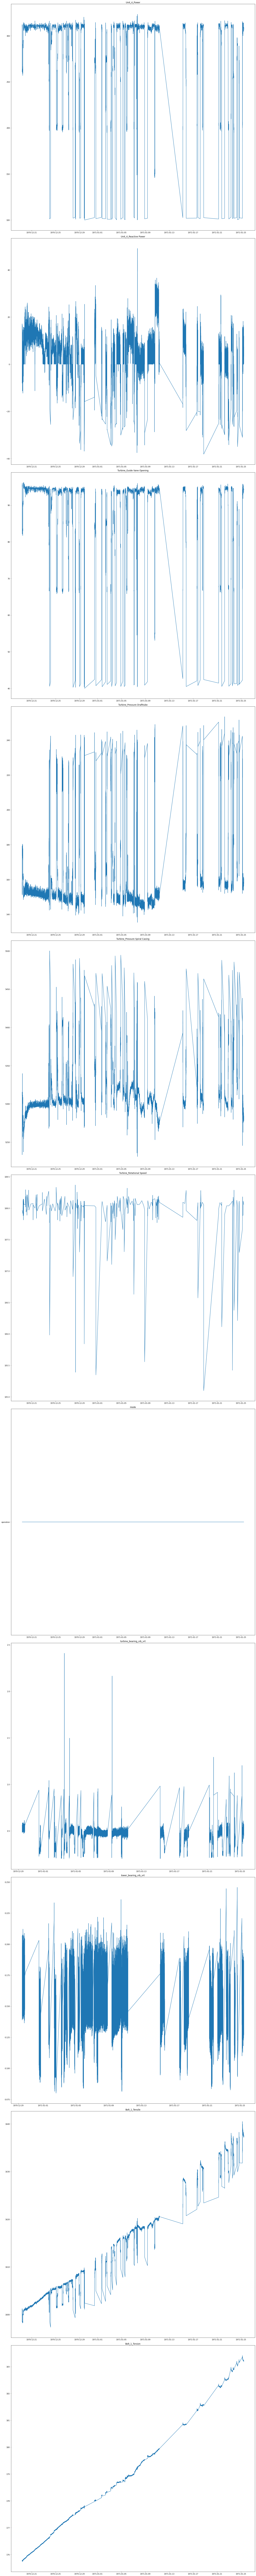

In [122]:
fig, axs = plt.subplots(len(dataBolt1Operation), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].plot(dataBolt1Operation[i])
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

In [ ]:
Bolt1Operationdf.to_csv('bol1Dataset2Operation.csv', index=False)
Bolt1Operationdf.to_csv('bol1Dataset2Operation.csv', index=False)